#The goal of this assignment is to implement a deep neural network (DNN) model for fake news detection. (DNN for binary classification)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re                              
import string   
import random  
from collections import Counter
from itertools import chain
from numpy.random import rand 
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

dataset_path = '/content/drive/My Drive/Assignment_2_NLP'

Mounted at /content/drive


# **Read the Fake news dataset into a pandas dataframe**

## Read the training data

In [ ]:
dataset_pd_train = pd.read_csv(os.path.join(dataset_path,'FakeNews_train.csv'), sep='\t')
print(dataset_pd_train)

                                                   text label
0     Get the latest from TODAY Sign up for our news...     1
1     2d  Conan On The Funeral Trump Will Be Invited...     1
2     It’s safe to say that Instagram Stories has fa...     0
3     Much like a certain Amazon goddess with a lass...     0
4     At a time when the perfect outfit is just one ...     0
...                                                 ...   ...
4982  The storybook romance of WWE stars John Cena a...     0
4983  The actor told friends he’s responsible for en...     0
4984  Sarah Hyland is getting real.  The Modern Fami...     0
4985  Production has been suspended on the sixth and...     0
4986  A jury ruled against Bill Cosby in his sexual ...     0

[4987 rows x 2 columns]


In [ ]:
list_of_news_train = list(dataset_pd_train['text'])
list_of_labels_train = list(dataset_pd_train['label'])
type(list_of_news_train)

list

### Check if the dataset has any samples without labels (unlabled samples)

In [ ]:
Total_unique_labels = dataset_pd_train.groupby('label').size()
print(Total_unique_labels)

label
0        2972
1        2014
label       1
dtype: int64


This dataset has one unlabeled sample. 

Find the index of the unlabled sample and remove it.

In [ ]:
idx_2_remove = (dataset_pd_train[dataset_pd_train['label']=='label'].index.values)
print(idx_2_remove)

[1615]


In [ ]:
list_of_news_train.pop(idx_2_remove[0])
list_of_labels_train.pop(idx_2_remove[0])

print(len(list_of_news_train))
print(len(list_of_labels_train))

4986
4986


In [ ]:
list_of_labels_train = [int(label) for label in list_of_labels_train]
len(list_of_labels_train)

4986

### Check the number of fake news versus true news in the train dataset

In [ ]:
Total_TrueNews_train = Total_unique_labels[0]
Total_FakeNews_train = Total_unique_labels[1]
print("The total number of true news in the dataset is: ",Total_TrueNews_train)
print("The total number of fake news in the dataset is: ",Total_FakeNews_train)

The total number of true news in the dataset is:  2972
The total number of fake news in the dataset is:  2014


## Read the test data

In [ ]:
dataset_pd_test = pd.read_csv(os.path.join(dataset_path,'FakeNews_test.csv'), sep='\t')
print(dataset_pd_test)

        id                                               text
0        2  The 2017 Teen Choice Awards ceremony was held ...
1        3  The concert, part of “The Joshua Tree Tour,” w...
2        4  Selena Gomez refuses to talk to her mother abo...
3        5  This is worse than a lump of coal in your stoc...
4        6  Luann De Lesseps is going to rehab after her a...
...    ...                                                ...
1242  1244  Get the latest from TODAY Sign up for our news...
1243  1245  Jaden Smith claims that the Four Seasons Hotel...
1244  1246  Overview (3)  Mini Bio (1)  Faith Hill was bor...
1245  1247  CLOSE Aaron Paul dishes on 'The Path'  Aaron P...
1246  1248  Meghan Edmonds was showered with love at her b...

[1247 rows x 2 columns]


In [ ]:
list_of_news_test = list(dataset_pd_test['text'])

In [ ]:
pd_ = pd.read_csv(os.path.join(dataset_path,'FakeNews_id_to_lable_test.csv'), sep=',')
print(pd_)

        id  label
0        2      1
1        3      1
2        4      0
3        5      0
4        6      0
...    ...    ...
1242  1244      0
1243  1245      0
1244  1246      1
1245  1247      1
1246  1248      1

[1247 rows x 2 columns]


In [ ]:
Total_unique_labels = pd_.groupby('label').size()
print(Total_unique_labels)

label
0    630
1    617
dtype: int64


### Check the number of fake news versus true news in the test dataset

In [ ]:
Total_TrueNews_test = Total_unique_labels[0]
Total_FakeNews_test = Total_unique_labels[1]
print("The total number of true news in the test dataset is: ",Total_TrueNews_test)
print("The total number of fake news in the test dataset is: ",Total_FakeNews_test)

The total number of true news in the test dataset is:  630
The total number of fake news in the test dataset is:  617


In [ ]:
list_of_labels_test = list(pd_['label'])
list_of_labels_test = [int(label) for label in list_of_labels_test]
len(list_of_labels_test)

1247

## **Data Pre-processing**


### Remove URLs, special characters, digits etc.

In [ ]:
remove_URL = lambda x : re.sub(r'https?://[^\s\n\r]+', '', x)
list_of_news_train = list((map(remove_URL, list_of_news_train)))
list_of_news_test = list((map(remove_URL, list_of_news_test)))

remove_handles = lambda x : re.sub(r'@[^\s\n\r]+', '', x)
list_of_news_train = list((map(remove_handles, list_of_news_train)))
list_of_news_test = list((map(remove_handles, list_of_news_test)))

remove_all_exceptLetters = lambda x : re.sub(r'[^a-zA-Z]+', ' ', x)
list_of_news_train = list((map(remove_all_exceptLetters, list_of_news_train)))
list_of_news_test = list((map(remove_all_exceptLetters, list_of_news_test)))

In [ ]:
dataset_pd_train.iloc[1]['text']

'2d  Conan On The Funeral Trump Will Be Invited To - CONAN on TBS'

In [ ]:
dataset_pd_train.iloc[34]['text']

'Who will come out? (2017)  Tweet Topic Started: Nov 20 2016, 06:07 PM (269,368 Views)    Posts: 6,719 Group: Members Member #15,123 Joined: Sep 8, 2014 Guest Jun 30 2017, 10:06 PM Boue67 Jun 30 2017, 09:48 PM i think the Nathalie Morales who is married is the journalist from NBC Holly Miranda thread\'s talk is about this    https://www.instagram.com/p/-25xJekTT9/?taken-by=hollymiranda    http://www.dailymail.co.uk/tvshowbiz/article-4448196/John-Mayer-dating-actress-Natalie-Morales.html Holly Miranda thread\'s talk is about this instagram post and in their gossip Natalie Morales is married to Sean Mennie, but I can\'t find any proof or even gossip from other sources for it. In April Daily Fail published story that Natalie is dating John Mayer, which don\'t has any mention of Natalie being married which would indicate that if she is she has hided it pretty well although DM isn\'t very good in journalism so they may have just failed as in their typical fashion. anything is possible in li

In [ ]:
list_of_news_train[34] #check that https got removed

'Who will come out Tweet Topic Started Nov PM Views Posts Group Members Member Joined Sep Guest Jun PM Boue Jun PM i think the Nathalie Morales who is married is the journalist from NBC Holly Miranda thread s talk is about this Holly Miranda thread s talk is about this instagram post and in their gossip Natalie Morales is married to Sean Mennie but I can t find any proof or even gossip from other sources for it In April Daily Fail published story that Natalie is dating John Mayer which don t has any mention of Natalie being married which would indicate that if she is she has hided it pretty well although DM isn t very good in journalism so they may have just failed as in their typical fashion anything is possible in life but i cant see any trace of the Sean guy in her ig That s no proof of course As for the Meyer thing i almost fell of my chair laughing Did the mannatees picked that one Guest Jun PM Post Unregistered Boue Jun PM Guest Jun PM Guest Jun PM What does queer even mean I m l

In [ ]:
import nltk       
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
                     
from nltk.tokenize import word_tokenize                             
from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


### Word Tokenize

In [ ]:
word_tokens = lambda x: word_tokenize(x)
list_of_news_train_WordTokenized = list((map(word_tokens, list_of_news_train)))
list_of_news_test_WordTokenized = list((map(word_tokens, list_of_news_test)))

In [ ]:
list_of_news_train_WordTokenized[1]

['d',
 'Conan',
 'On',
 'The',
 'Funeral',
 'Trump',
 'Will',
 'Be',
 'Invited',
 'To',
 'CONAN',
 'on',
 'TBS']

### Remove stopwords

In [ ]:
stop_words = stopwords.words('english') 

remove_stopwords = lambda x :  [w for w in x if w.lower() not in stop_words]
list_of_news_train_without_stopwords = list((map(remove_stopwords,list_of_news_train_WordTokenized)))
list_of_news_test_without_stopwords = list((map(remove_stopwords,list_of_news_test_WordTokenized)))

In [ ]:
list_of_news_train_without_stopwords[1]

['Conan', 'Funeral', 'Trump', 'Invited', 'CONAN', 'TBS']

### Lemmatization

In [ ]:
lemmatizer = WordNetLemmatizer()
stemming = lambda x : [lemmatizer.lemmatize(word) for word in x] 
list_of_news_train_lematized = list((map(stemming,list_of_news_train_without_stopwords)))
list_of_news_test_lematized= list((map(stemming,list_of_news_test_without_stopwords)))

In [ ]:
list_of_news_train_lematized[1]

['Conan', 'Funeral', 'Trump', 'Invited', 'CONAN', 'TBS']

### Lowercase all words

In [ ]:
lowercase = lambda x :  [w.lower() for w in x]
list_of_news_train_clean = list((map(lowercase,list_of_news_train_lematized)))
list_of_news_test_clean = list((map(lowercase,list_of_news_test_lematized)))

In [ ]:
list_of_news_train_clean[1]

['conan', 'funeral', 'trump', 'invited', 'conan', 'tbs']

### Split the data into train, validation and test sets

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [ ]:
# Split data in this category to Train and (Val+Test)
X_train_News, X_val_News, Y_train_News, Y_val_News = train_test_split(list_of_news_train_clean, list_of_labels_train,test_size=0.1, random_state=42)
X_train_News, Y_train_News = shuffle(X_train_News, np.array(Y_train_News), random_state = 10)
X_val_News, Y_val_News = shuffle(X_val_News, np.array(Y_val_News), random_state = 10)

In [ ]:
X_test_News = list_of_news_test_clean 
Y_test_News = list_of_labels_test

In [ ]:
print(len(X_train_News))
print(len(X_val_News))
print(len(X_test_News))

4487
499
1247


In [ ]:
X_train_News[8][0:10]

['click',
 'photo',
 'tired',
 'squeezing',
 'jumping',
 'wiggling',
 'get',
 'jean',
 'thankfully',
 'celebs']

### Check the length of each input in the train set to decide the max input length

In [ ]:
#input_lengthS =  ([len(encoded_news) for encoded_news in encoded_news_train])
input_lengthS =  ([len(news) for news in X_train_News])
print(input_lengthS)

max_input_length =  max(input_lengthS)
print("The length of the longest sample is: ",max_input_length)
print("The average input lentgh is: ")
print(sum(input_lengthS) / len(input_lengthS))

k = 500
count = len([i for i in input_lengthS if i > k])
print("The number of news articles that have length greater than ", k, "is : ", count)

[128, 53, 247, 100, 275, 148, 145, 1590, 85, 457, 227, 224, 113, 28, 251, 167, 458, 181, 377, 107, 180, 1331, 5, 153, 106, 23, 8451, 46, 416, 388, 332, 139, 3226, 790, 132, 243, 328, 296, 132, 151, 243, 165, 739, 3773, 420, 557, 36, 696, 187, 126, 363, 164, 101, 314, 46, 160, 187, 491, 591, 264, 348, 124, 394, 4, 227, 1082, 218, 423, 6784, 482, 194, 302, 225, 4, 450, 352, 44, 61, 136, 111, 374, 270, 690, 268, 200, 158, 35, 62, 69, 1362, 413, 243, 181, 86, 395, 287, 156, 282, 81, 136, 203, 27, 218, 136, 180, 97, 157, 3311, 144, 245, 58, 208, 276, 263, 1043, 596, 149, 122, 307, 4, 236, 216, 236, 182, 248, 625, 273, 65, 124, 275, 20, 127, 263, 487, 173, 236, 122, 46, 314, 178, 235, 798, 168, 482, 442, 73, 194, 184, 910, 50, 76, 270, 68, 12, 11, 1093, 224, 14, 224, 201, 10, 337, 159, 224, 193, 172, 816, 328, 172, 99, 231, 81, 386, 6, 219, 56, 195, 186, 203, 288, 381, 228, 180, 174, 85, 114, 110, 286, 283, 165, 51, 158, 156, 401, 713, 278, 45, 296, 259, 49, 2616, 246, 137, 303, 566, 239, 21

The average length of the input samples is 370 approximately and the length of the longest input is 9604. In order to make all inputs of the same length, We choose to truncate the input samples so that all inputs are of length k. k is chosen to be 1500 because with this value we have only fraction of total samples (641 out of 4487) for which some of the data will be lost as a result of truncation.

### Check the total unique words in the training set

In [ ]:
#allWordsTrain = []
#for wordList in X_train_News:
#  allWordsTrain += wordList

#allWordsTrain= np.array(allWordsTrain) 
#unique_words = np.unique(allWordsTrain)
#print(np.shape(unique_words))

Total unique words in the training dataset are 53185. When building the vocabulary, we choose to keep only top 20000 words.

### Convert the "cleaned" word tokenized news into a single string 

In [ ]:
def join_words(dataset, len_dataset):
  joined_words_list = []
  for i in range(0, len_dataset):
    joined = [(' '.join(dataset[i]))]
    joined_words_list.append(joined)

  return joined_words_list

In [ ]:
News_list_train = join_words(X_train_News, len(X_train_News))
News_list_val = join_words(X_val_News, len(X_val_News))
News_list_test = join_words(X_test_News, len(X_test_News))
print(len(News_list_train))
print(len(News_list_val))
print(len(News_list_test))

4487
499
1247


In [ ]:
print((News_list_train[1]))
print(len([1]))

['time year plenty time watch movie including new release probably seen new star wars movie right feel like going know netflix big budget smith movie also available comfort home already netflix password handy top ridley scott money world premiered christmas weekend coming next well glad ask new trailer black panther quite trailer thi']
1


## Build the volabulary (create indices for all words in the vocabulary)

In [ ]:
from tensorflow.keras.layers import TextVectorization

In [ ]:
TOP_K = 20000
MAX_SEQUENCE_LENGTH = k

In [ ]:
vectorizer = TextVectorization(max_tokens=TOP_K, output_sequence_length=MAX_SEQUENCE_LENGTH)
text_ds = tf.data.Dataset.from_tensor_slices(News_list_train).batch(128)
vectorizer.adapt(text_ds)

In [ ]:
vectorizer.get_vocabulary()[:5]

['', '[UNK]', 'year', 'one', 'said']

' ' is reserved for padding anf '[UKN]' is reserved for OOV

In [ ]:
voc = vectorizer.get_vocabulary()
word_index = dict(zip(voc, range(len(voc))))
print(word_index)

{'': 0, '[UNK]': 1, 'year': 2, 'one': 3, 'said': 4, 'time': 5, 'new': 6, 'also': 7, 'first': 8, 'like': 9, 'people': 10, 'show': 11, 'would': 12, 'get': 13, 'two': 14, 'say': 15, 'day': 16, 'film': 17, 'know': 18, 'life': 19, 'family': 20, 'star': 21, 'love': 22, 'season': 23, 'back': 24, 'want': 25, 'going': 26, 'think': 27, 'told': 28, 'woman': 29, 'best': 30, 'make': 31, 'trump': 32, 'u': 33, 'made': 34, 'may': 35, 'thing': 36, 'child': 37, 'way': 38, 'news': 39, 'last': 40, 'together': 41, 'go': 42, 'right': 43, 'well': 44, 'friend': 45, 'old': 46, 'even': 47, 'see': 48, 'series': 49, 'really': 50, 'world': 51, 'million': 52, 'photo': 53, 'couple': 54, 'story': 55, 'video': 56, 'source': 57, 'work': 58, 'since': 59, 'got': 60, 'come': 61, 'month': 62, 'relationship': 63, 'could': 64, 'take': 65, 'much': 66, 'look': 67, 'week': 68, 'good': 69, 'still': 70, 'president': 71, 'york': 72, 'home': 73, 'actress': 74, 'three': 75, 'many': 76, 'later': 77, 'role': 78, 'never': 79, 'american

In [ ]:
num_tokens = len(voc) + 2
print(num_tokens)

20002


## Ceate DNN models

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### [1] Define the model: Baseline model - Embeddings are randomly initialized and trained during the model training

In [ ]:
def Dense_functional(input_shape, x_train, y_train,x_val, y_val, x_test, y_test, embd_dim, num_features):
  input_shape = input_shape
  inputs = keras.Input(shape=(input_shape,)) # input_shape is the dimension of a single sample in the input data

  x = inputs       
  #### Create a model structure (by specifying nodes in the graph of layers)
  # Add NN layers
  embedding_layer = layers.Embedding(input_dim=num_features, output_dim=embd_dim, embeddings_initializer="uniform", input_length= input_shape)(x) # the embedding layer is randomly initialized and trained during the training step
  #embeddings = embedding_layer.get_weights()[0]
  x = layers.Flatten()(embedding_layer)
  x = layers.Dense(100, activation ="relu")(x)
  x = layers.Dense(50, activation="relu")(x)
  x = layers.Dense(10, activation="relu")(x)
  outputs = layers.Dense(2, activation="sigmoid")(x)

  # Create a Model by specifying its inputs and outputs
  model = keras.Model(inputs=inputs, outputs=outputs, name="fully_connected_DNN_model")

  # Print the model summary
  model.summary()

  # Plot the model
  #keras.utils.plot_model(model, "Dense.png", show_shapes=True)

  #### Train the model
  model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False), optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"],)
  history = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=20, epochs=10)

  print("Train accuracy", history.history['accuracy'][-1])
  print("Train loss:", history.history['loss'][-1] )
  
  embeddings = model.layers[1].get_weights()[0] #get the embeddings for the words in the vocabulary
        
  #### Evaluate the model
  test_scores = model.evaluate(x_test, y_test, verbose=2)
  print("Test loss:", test_scores[0])
  print("Test accuracy:", test_scores[1])

  test_sample = x_test
  predict_result = model.predict(test_sample)
  layer_softmax = tf.keras.layers.Softmax()
  result = layer_softmax(predict_result).numpy()
  Prediction = np.argmax(result, axis=1)

  return history.history['accuracy'][-1], history.history['loss'][-1], test_scores[1], test_scores[0], Prediction, embeddings

### Train and test the model

In [ ]:
#x_train = vectorizer(np.array([[s] for s in News_list_train])).numpy()
#x_val = vectorizer(np.array([[s] for s in News_list_val])).numpy()
#x_test = vectorizer(np.array([[s] for s in News_list_test])).numpy()

x_train = vectorizer(np.array([s for s in News_list_train])).numpy()
x_val = vectorizer(np.array([s for s in News_list_val])).numpy()
x_test = vectorizer(np.array([s for s in News_list_test])).numpy()

y_train = np.array(Y_train_News)
y_val = np.array(Y_val_News)
y_test = np.array(Y_test_News)

In [ ]:
np.shape(x_train)

(4487, 500)

In [ ]:
np.shape(x_train[0])

(500,)

In [ ]:
x_train.shape[1]

500

In [ ]:
embd_dim = 100
num_features = num_tokens

In [ ]:
train_acc, train_loss, test_acc, test_loss, prediction, embeddings_1 = Dense_functional(x_train.shape[1], x_train, y_train,x_val, y_val, x_test, y_test, embd_dim, num_features ) 

Model: "fully_connected_DNN_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 embedding (Embedding)       (None, 500, 100)          2000200   
                                                                 
 flatten (Flatten)           (None, 50000)             0         
                                                                 
 dense (Dense)               (None, 100)               5000100   
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 dense_3 (Dense)             (None, 2)   

### Evaluation metrics

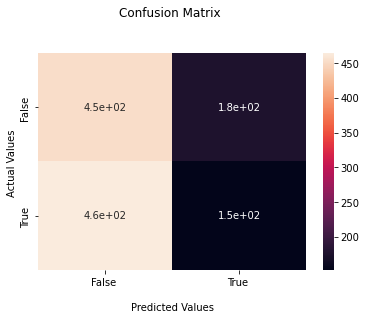

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion_matrix = confusion_matrix(y_test, prediction.flatten())

ax = sns.heatmap(confusion_matrix, annot=True)
ax.set_title('Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False ','True '])
ax.yaxis.set_ticklabels(['False ','True '])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
Recall = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[1,0])
print("The recall is: ", Recall)

Precision = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print("The Precision is: ",Precision)

F1_score = (2*Precision*Recall)/(Precision + Recall)
print("The F1 score is: ", F1_score)

The recall is:  0.24635332252836303
The Precision is:  0.46200607902735563
The F1 score is:  0.321353065539112


### [2] Define the model: Embeddings are initialized using pretrained embeddings




#### Use pre-trained embeddings from gensim API

In [ ]:
# gensim api includes pretrained embeddings and corpora
import gensim.downloader as api

In [ ]:
#check the information of a pretrained model
api.info('glove-wiki-gigaword-100')

{'num_records': 400000,
 'file_size': 134300434,
 'base_dataset': 'Wikipedia 2014 + Gigaword 5 (6B tokens, uncased)',
 'reader_code': 'https://github.com/RaRe-Technologies/gensim-data/releases/download/glove-wiki-gigaword-100/__init__.py',
 'license': 'http://opendatacommons.org/licenses/pddl/',
 'parameters': {'dimension': 100},
 'description': 'Pre-trained vectors based on Wikipedia 2014 + Gigaword 5.6B tokens, 400K vocab, uncased (https://nlp.stanford.edu/projects/glove/).',
 'preprocessing': 'Converted to w2v format with `python -m gensim.scripts.glove2word2vec -i <fname> -o glove-wiki-gigaword-100.txt`.',
 'read_more': ['https://nlp.stanford.edu/projects/glove/',
  'https://nlp.stanford.edu/pubs/glove.pdf'],
 'checksum': '40ec481866001177b8cd4cb0df92924f',
 'file_name': 'glove-wiki-gigaword-100.gz',
 'parts': 1}

In [ ]:
#load one of the pretrained embeddings
model_gigaword = api.load('glove-wiki-gigaword-100')

[==================================================] 100.0% 128.1/128.1MB downloaded


In [ ]:
print(word_index)

{'': 0, '[UNK]': 1, 'year': 2, 'one': 3, 'said': 4, 'time': 5, 'new': 6, 'also': 7, 'first': 8, 'like': 9, 'people': 10, 'show': 11, 'would': 12, 'get': 13, 'two': 14, 'say': 15, 'day': 16, 'film': 17, 'know': 18, 'life': 19, 'family': 20, 'star': 21, 'love': 22, 'season': 23, 'back': 24, 'want': 25, 'going': 26, 'think': 27, 'told': 28, 'woman': 29, 'best': 30, 'make': 31, 'trump': 32, 'u': 33, 'made': 34, 'may': 35, 'thing': 36, 'child': 37, 'way': 38, 'news': 39, 'last': 40, 'together': 41, 'go': 42, 'right': 43, 'well': 44, 'friend': 45, 'old': 46, 'even': 47, 'see': 48, 'series': 49, 'really': 50, 'world': 51, 'million': 52, 'photo': 53, 'couple': 54, 'story': 55, 'video': 56, 'source': 57, 'work': 58, 'since': 59, 'got': 60, 'come': 61, 'month': 62, 'relationship': 63, 'could': 64, 'take': 65, 'much': 66, 'look': 67, 'week': 68, 'good': 69, 'still': 70, 'president': 71, 'york': 72, 'home': 73, 'actress': 74, 'three': 75, 'many': 76, 'later': 77, 'role': 78, 'never': 79, 'american

In [ ]:
print(len(word_index))

20000


In [ ]:
# Prepare an embedding matrix for feeding into the embedding layer of the model
hits = 0
misses = 0

embedding_matrix = np.zeros((num_tokens, embd_dim))
for word, i in word_index.items():
    embedding_vector = model_gigaword['word']
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Converted 20000 words (0 misses)


In [ ]:
np.shape(embedding_matrix)

(20002, 100)

The following code covers two cases:

1.   pre-trained embeddings are fine tuned during training
2.   pre-trained embeddings are frozen during training


In [ ]:
def Dense_functional(input_shape, x_train, y_train,x_val, y_val, x_test, y_test, embd_dim, num_features, EmbdIsTrainable, embedding_matrix):
  input_shape = input_shape
  inputs = keras.Input(shape=(input_shape,)) # input_shape is the dimension of a single sample in the input data
  #inputs = keras.Input(shape=(None,))

  x = inputs       
  #### Create a model structure (by specifying nodes in the graph of layers)
  # Add NN layers
  if EmbdIsTrainable:
    x = layers.Embedding(input_dim=num_features, output_dim=embd_dim, embeddings_initializer=keras.initializers.Constant(embedding_matrix), input_length= input_shape, trainable=True)(x) # fine tune the embeddings
  else:
    x = layers.Embedding(input_dim=num_features, output_dim=embd_dim, embeddings_initializer=keras.initializers.Constant(embedding_matrix), input_length= input_shape, trainable=False)(x) # freeze the embeddings

  x = layers.Flatten()(x)
  x = layers.Dense(100, activation ="relu")(x)
  x = layers.Dense(50, activation="relu")(x)
  x = layers.Dense(10, activation="relu")(x)
  outputs = layers.Dense(2, activation="sigmoid")(x)

  # Create a Model by specifying its inputs and outputs
  model = keras.Model(inputs=inputs, outputs=outputs, name="fully_connected_DNN_model")

  # Print the model summary
  model.summary()

  # Plot the model
  #keras.utils.plot_model(model, "Dense.png", show_shapes=True)

  #### Train the model
  model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False), optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"],)
  history = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=20, epochs=10)

  print("Train accuracy", history.history['accuracy'][-1])
  print("Train loss:", history.history['loss'][-1] )

  embeddings = model.layers[1].get_weights()[0] #get the embeddings for the words in the vocabulary
        
  #### Evaluate the model
  test_scores = model.evaluate(x_test, y_test, verbose=2)
  print("Test loss:", test_scores[0])
  print("Test accuracy:", test_scores[1])

  test_sample = x_test
  predict_result = model.predict(test_sample)
  layer_softmax = tf.keras.layers.Softmax()
  result = layer_softmax(predict_result).numpy()
  Prediction = np.argmax(result, axis=1)

  return history.history['accuracy'][-1], history.history['loss'][-1], test_scores[1], test_scores[0], Prediction, embeddings

### Train and test the model  - Using pretrained embedding and fine tune during model training

In [ ]:
train_acc, train_loss, test_acc, test_loss, prediction, embeddings_2 = Dense_functional(x_train.shape[1], x_train, y_train,x_val, y_val, x_test, y_test, embd_dim, num_features,1,embedding_matrix ) # fine tune the embeddings

Model: "fully_connected_DNN_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 500)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 500, 100)          2000200   
                                                                 
 flatten_1 (Flatten)         (None, 50000)             0         
                                                                 
 dense_4 (Dense)             (None, 100)               5000100   
                                                                 
 dense_5 (Dense)             (None, 50)                5050      
                                                                 
 dense_6 (Dense)             (None, 10)                510       
                                                                 
 dense_7 (Dense)             (None, 2)   

### Evaluation metrics

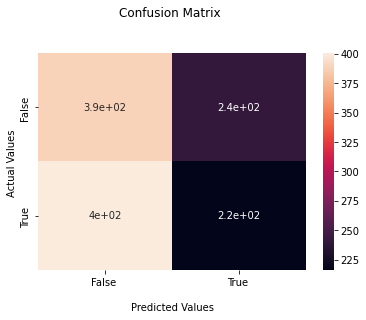

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion_matrix = confusion_matrix(y_test, prediction.flatten())

ax = sns.heatmap(confusion_matrix, annot=True)
ax.set_title('Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False ','True '])
ax.yaxis.set_ticklabels(['False ','True '])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
Recall = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[1,0])
print("The recall is: ", Recall)

Precision = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print("The Precision is: ",Precision)

F1_score = (2*Precision*Recall)/(Precision + Recall)
print("The F1 score is: ", F1_score)

The recall is:  0.3500810372771475
The Precision is:  0.4726477024070022
The F1 score is:  0.4022346368715084


### Train and test the model  - Using pretrained embedding and freeze during training

In [ ]:
train_acc, train_loss, test_acc, test_loss, prediction, embeddings_3 = Dense_functional(x_train.shape[1], x_train, y_train,x_val, y_val, x_test, y_test, embd_dim, num_features,0,embedding_matrix ) # freeze the embeddings

Model: "fully_connected_DNN_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 500)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 500, 100)          2000200   
                                                                 
 flatten_2 (Flatten)         (None, 50000)             0         
                                                                 
 dense_8 (Dense)             (None, 100)               5000100   
                                                                 
 dense_9 (Dense)             (None, 50)                5050      
                                                                 
 dense_10 (Dense)            (None, 10)                510       
                                                                 
 dense_11 (Dense)            (None, 2)   

### Evaluation metrics

In [ ]:
Recall = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[1,0])
print("The recall is: ", Recall)

Precision = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print("The Precision is: ",Precision)

F1_score = (2*Precision*Recall)/(Precision + Recall)
print("The F1 score is: ", F1_score)

The recall is:  0.0
The Precision is:  nan
The F1 score is:  nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in long_scalars
  after removing the cwd from sys.path.


# References

1. Text classification example: https://developers.google.com/machine-learning/guides/text-classification/step-3
2. Text Vectorization layer keras: https://www.tensorflow.org/api_docs/python/tf/keras/layers/TextVectorization
3. https://www.oreilly.com/library/view/applied-text-analysis/9781491963036/ch04.html
4. Text Vectorization: https://medium.com/@kaliprasadeducation/3-types-of-text-vectorization-444e01d01b7d
5. https://www.dominodatalab.com/blog/named-entity-recognition-ner-challenges-and-model
